In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import random
from scipy.stats import f_oneway

In [3]:
# Read dataset to a dataframe
df = pd.read_csv('clean_kaggle_data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **Part 1: Exploratory data analysis**

**Data exploration**

In [4]:
# Check the shape of the dataframe
print('Shape of this dataframe is {}'.format(df.shape))

Shape of this dataframe is (10729, 356)


In [5]:
# Check columns names
df.columns

Index(['Unnamed: 0', 'Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=356)

Text(0.5, 1.0, 'Barplot of age')

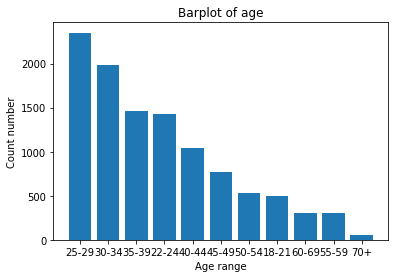

In [6]:
# Extract count for each age range
age_count=df['Q1'].value_counts()
count=age_count.values
age_range=age_count.index
# Plot barplot
plt.bar(age_range,count)
plt.xlabel('Age range')
plt.ylabel('Count number')
plt.title('Barplot of age')


Text(0.5, 1.0, 'Barplot of education level')

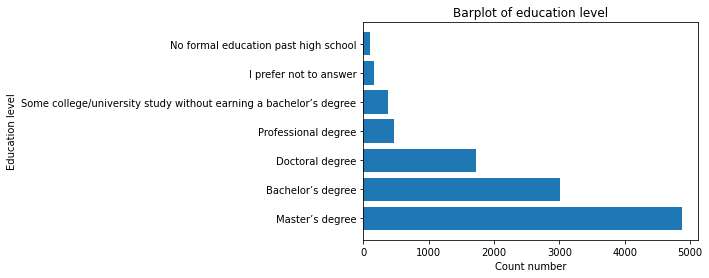

In [7]:
# Create barplot for education
# Extract count for each education level
education_count=df['Q4'].value_counts()
count=education_count.values
education_level=education_count.index
# Plot barplot
plt.barh(education_level,count)
plt.xlabel('Count number')
plt.ylabel('Education level')
plt.title('Barplot of education level')

Text(0.5, 1.0, 'Histogram of salary')

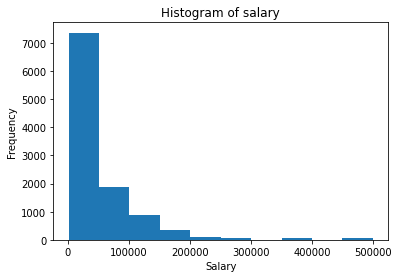

In [8]:
# Create histogram for salary
# Extract salary from dataset
salary=df['Q24']
# Plot histogram
num_bins=10
plt.hist(salary,num_bins)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of salary')

# **Part 2: Estimate difference between average salary of men and women**

In [9]:
# Check if there is any missing data in Q24 and Q2
print('There is {} missing data in Q24'.format(df['Q24'].isnull().sum()))
print('There is {} missing data in Q2'.format(df['Q2'].isnull().sum()))

There is 0 missing data in Q24
There is 0 missing data in Q2


In [10]:
# Compute descriptive statistics for each group
salary_and_gender=df[['Q2','Q24']]
male_salary=salary_and_gender[salary_and_gender['Q2']=='Man']['Q24']
female_salary=salary_and_gender[salary_and_gender['Q2']=='Woman']['Q24']
print('Descriptive statistics for Men:\n',male_salary.describe())
print('Descriptive statistics for Women:\n',female_salary.describe())

Descriptive statistics for Men:
 count      8872.000000
mean      50750.619928
std       70347.974812
min        1000.000000
25%        3000.000000
50%       25000.000000
75%       70000.000000
max      500000.000000
Name: Q24, dtype: float64
Descriptive statistics for Women:
 count      1683.000000
mean      36417.112299
std       59442.716093
min        1000.000000
25%        1000.000000
50%        7500.000000
75%       50000.000000
max      500000.000000
Name: Q24, dtype: float64


In [25]:
# Shapiro test for normality
s_m,p_m=stats.shapiro(male_salary)
s_w,p_w=stats.shapiro(female_salary)
print('Shapiro test for normality of men salary: P-value is {}'.format(p_m))
print('Shapiro test for normality of women salary: P-value is {}'.format(p_w))

Shapiro test for normality of men salary: P-value is 0.0
Shapiro test for normality of women salary: P-value is 0.0


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [11]:
# Set bootstrap size equal to original size 
male_size=8872
female_size=1683

In [12]:
# Create lists to store the mean of bootstrap samples
male_mean_list=[]
female_mean_list=[]
# Number of times to resample from the data
t=1000

In [13]:
# Perform bootstrap and store mean of each group to the lists
for i in np.arange(t):
    male_samples=np.random.choice(male_salary.values,male_size,replace=True)
    female_samples=np.random.choice(female_salary.values,female_size,replace=True)
    male_mean=male_samples.mean()
    female_mean=female_samples.mean()
    male_mean_list.append(male_mean)
    female_mean_list.append(female_mean)

Text(0.5, 1.0, 'Distirbution of average salary for men and women')

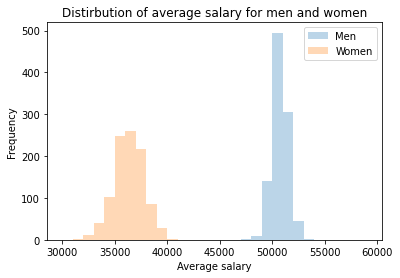

In [14]:
bins=np.arange(30000,60000,1000)
# Plot bootstrapped distribution for male
plt.hist(male_mean_list,bins=bins,alpha=0.3,label='Men')
# Plot bootstrapped distribution for female
plt.hist(female_mean_list,bins=bins,alpha=0.3,label='Women')
plt.legend()
plt.xlabel('Average salary')
plt.ylabel('Frequency')
plt.title('Distirbution of average salary for men and women')

Text(0.5, 1.0, 'Distribution of difference in average salary')

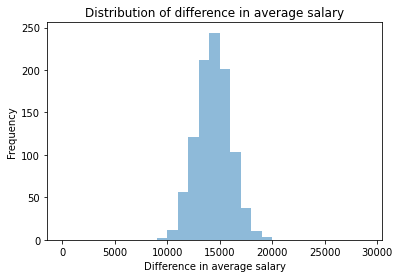

In [15]:
# Plot distribution of difference in means
difference=np.array(male_mean_list)-np.array(female_mean_list)
bins=np.arange(0,30000,1000)
plt.hist(difference,bins,alpha=0.5)
plt.xlabel('Difference in average salary')
plt.ylabel('Frequency')
plt.title('Distribution of difference in average salary')

In [16]:
# Perform Welch's t-test and set equal variance to False
tc, pc = stats.ttest_ind(np.array(male_mean_list), np.array(female_mean_list),equal_var=False)
print ('t-test: t = {}  p = {}'.format(tc,pc))

t-test: t = 285.061022803086  p = 0.0


# **Part 3: Estimate difference in average salary on level of formal education**

In [17]:
# Check if there is any missing data in Q24 and Q4
print('There is {} missing data in Q24'.format(df['Q24'].isnull().sum()))
print('There is {} missing data in Q2'.format(df['Q4'].isnull().sum()))

There is 0 missing data in Q24
There is 0 missing data in Q2


In [18]:
# Compute descriptive statistics for each group
salary_and_education=df[['Q4','Q24']]
bachelor_salary=salary_and_gender[salary_and_education['Q4']=="Bachelor’s degree"]['Q24']
master_salary=salary_and_gender[salary_and_education['Q4']=="Master’s degree"]['Q24']
doctoral_salary=salary_and_gender[salary_and_education['Q4']=="Doctoral degree"]['Q24']
print("Descriptive statistics for Bachelor's degree:\n",bachelor_salary.describe())
print("Descriptive statistics for Master's degree:\n",master_salary.describe())
print("Descriptive statistics for Doctoral degree:\n",doctoral_salary.describe())

Descriptive statistics for Bachelor's degree:
 count      3013.000000
mean      35732.824427
std       60247.753546
min        1000.000000
25%        1000.000000
50%       10000.000000
75%       50000.000000
max      500000.000000
Name: Q24, dtype: float64
Descriptive statistics for Master's degree:
 count      4879.000000
mean      52120.106579
std       67681.571528
min        1000.000000
25%        4000.000000
50%       25000.000000
75%       70000.000000
max      500000.000000
Name: Q24, dtype: float64
Descriptive statistics for Doctoral degree:
 count      1718.000000
mean      68719.441211
std       85403.650394
min        1000.000000
25%        5000.000000
50%       40000.000000
75%       90000.000000
max      500000.000000
Name: Q24, dtype: float64


In [26]:
# Shapiro test for normality
s_bachelor,p_bachelor=stats.shapiro(bachelor_salary)
s_master,p_master=stats.shapiro(master_salary)
s_doctoral,p_doctoral=stats.shapiro(doctoral_salary)
print("Shapiro test for normality of bachelor's salary: P-value is {}".format(p_bachelor))
print("Shapiro test for normality of master's salary: P-value is {}".format(p_master))
print("Shapiro test for normality of doctoral salary: P-value is {}".format(p_doctoral))

Shapiro test for normality of bachelor's salary: P-value is 0.0
Shapiro test for normality of master's salary: P-value is 0.0
Shapiro test for normality of doctoral salary: P-value is 2.802596928649634e-45


In [19]:
# Set bootstrap size equal to original size
bachelor_size=3013
master_size=4879
doctoral_size=1718

In [20]:
# Create lists to store the mean of bootstrap samples
bachelor_mean_list=[]
master_mean_list=[]
doctoral_mean_list=[]
# Number of times to resample from the data
t=1000

In [21]:
# Perform bootstrap and store mean of each group to the lists
for i in np.arange(t):
    bachelor_samples=np.random.choice(bachelor_salary.values,bachelor_size,replace=True)
    master_samples=np.random.choice(master_salary.values,master_size,replace=True)
    doctoral_samples=np.random.choice(doctoral_salary.values,doctoral_size,replace=True)
    bachelor_mean=bachelor_samples.mean()
    master_mean=master_samples.mean()
    doctoral_mean=doctoral_samples.mean()
    bachelor_mean_list.append(bachelor_mean)
    master_mean_list.append(master_mean)
    doctoral_mean_list.append(doctoral_mean)

Text(0.5, 1.0, 'Distirbution of average salary for different level of formal education')

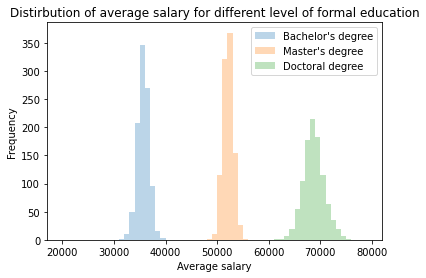

In [22]:
bins=np.arange(20000,80000,1000)
# Plot bootstrapped distribution for bachelor's degree
plt.hist(bachelor_mean_list,bins=bins,alpha=0.3,label="Bachelor's degree")
# Plot bootstrapped distribution for master's degree
plt.hist(master_mean_list,bins=bins,alpha=0.3,label="Master's degree")
# Plot bootstrapped distribution for doctoral degree
plt.hist(doctoral_mean_list,bins=bins,alpha=0.3,label="Doctoral degree")
plt.legend()
plt.xlabel('Average salary')
plt.ylabel('Frequency')
plt.title('Distirbution of average salary for different level of formal education')

Text(0.5, 1.0, 'Distribution of difference in average salary')

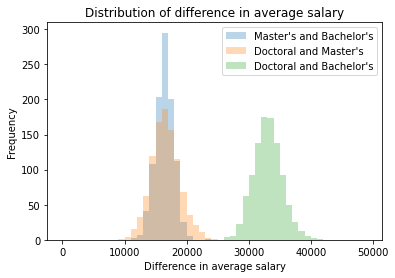

In [23]:
# Plot distribution of difference in means
# Calculate difference in means of master's degree and bachelor's degree
difference_m_to_b=np.array(master_mean_list)-np.array(bachelor_mean_list)
# Calculate difference in means of doctoral degree and master's degree
difference_d_to_m=np.array(doctoral_mean_list)-np.array(master_mean_list)
# Calculate difference in means of doctoral degree and bachelor's degree
difference_d_to_b=np.array(doctoral_mean_list)-np.array(bachelor_mean_list)
bins=np.arange(0,50000,1000)
# Plot distribution of each difference in means
plt.hist(difference_m_to_b,bins,alpha=0.3,label="Master's and Bachelor's")
plt.hist(difference_d_to_m,bins,alpha=0.3,label="Doctoral and Master's")
plt.hist(difference_d_to_b,bins,alpha=0.3,label="Doctoral and Bachelor's")
plt.legend()
plt.xlabel('Difference in average salary')
plt.ylabel('Frequency')
plt.title('Distribution of difference in average salary')

In [24]:
F, p = f_oneway(bachelor_mean_list, master_mean_list, doctoral_mean_list)
print ('ANOVA: F = {}  p = {}'.format(F,p))

ANOVA: F = 130879.2614796355  p = 0.0
